# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset

In [2]:
data=pd.read_csv("Social_Network_Ads.csv")
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

# Train-Test-Split

In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

# Feature Scaling

In [4]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# PCA for 2D visualization 

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x_train)


# K - Means Clustering

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)  # Choose initial k, e.g., 3
labels = kmeans.fit_predict(x_train)


C:\Users\G.SUBRAMANIAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


# Elbow Method to find optimal K

C:\Users\G.SUBRAMANIAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\G.SUBRAMANIAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\G.SUBRAMANIAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\G.SUBRAMANIAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

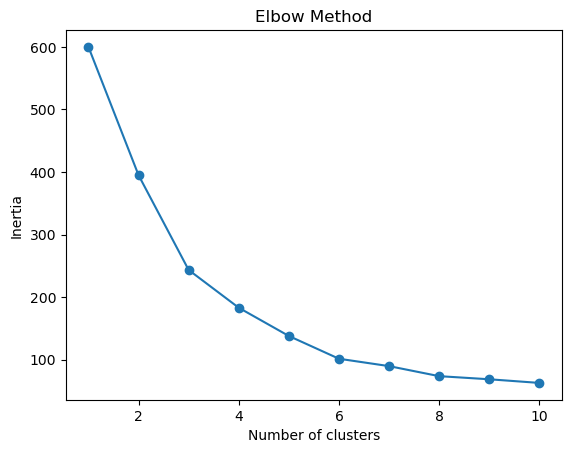

In [9]:
import matplotlib.pyplot as plt

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x_train)
    inertias.append(kmeans.inertia_)

plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


# Visualizing Clusters with color coding 

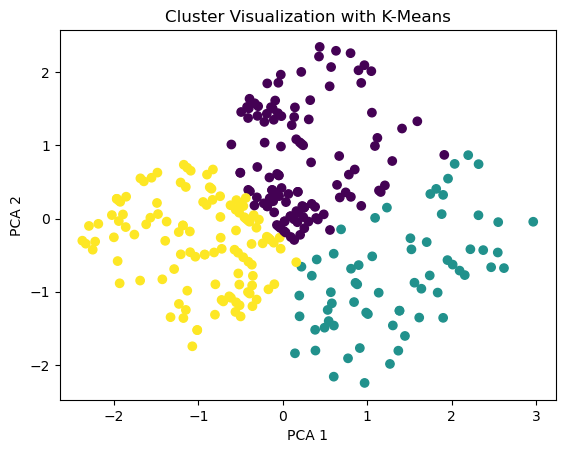

In [10]:
# Using PCA-reduced data
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("Cluster Visualization with K-Means")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


# Silhouette Score

In [11]:
from sklearn.metrics import silhouette_score

score = silhouette_score(x_train, labels)
print("Silhouette Score:", score)


Silhouette Score: 0.3625404546941325


In [12]:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_train)
    score = silhouette_score(x_train, labels)
    print(f"K={k}, Silhouette Score={score:.2f}")


K=2, Silhouette Score=0.31
K=3, Silhouette Score=0.36
K=4, Silhouette Score=0.38
K=5, Silhouette Score=0.41
K=6, Silhouette Score=0.44
K=7, Silhouette Score=0.44
K=8, Silhouette Score=0.41
K=9, Silhouette Score=0.39
K=10, Silhouette Score=0.40


C:\Users\G.SUBRAMANIAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\G.SUBRAMANIAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\G.SUBRAMANIAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\G.SUBRAMANIAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

# plotting the silhouette scores

C:\Users\G.SUBRAMANIAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\G.SUBRAMANIAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\G.SUBRAMANIAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\G.SUBRAMANIAN\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known

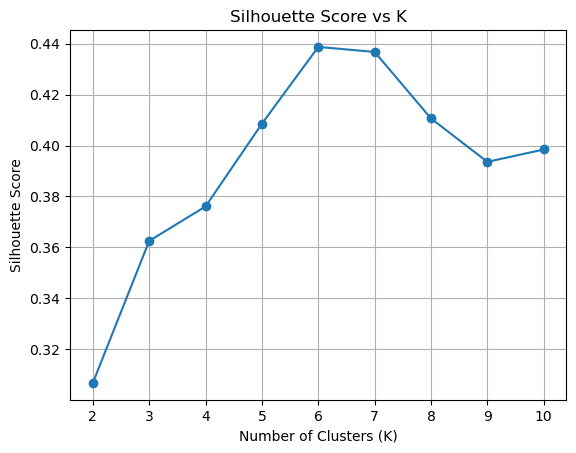

In [13]:
scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_train)
    score = silhouette_score(x_train, labels)
    scores.append(score)

plt.plot(range(2, 11), scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs K')
plt.grid(True)
plt.show()


In [15]:
print(f"Silhouette Score: {score:.2f} (closer to 1 means better-defined clusters)")

Silhouette Score: 0.40 (closer to 1 means better-defined clusters)


Based on silhouette scores, the optimal number of clusters is either 6 or 7, both yielding the highest score of 0.44. This indicates better-defined clusters compared to other K values.